In [1]:
import requests
import json
from astropy.io import ascii
from astropy.table import Table

In [2]:
def consulta_hms(hms,radius,format,catalog,amount):
    url = 'http://0.0.0.0:5000/get_data/lc_hms'
    args = {'hms':hms,'radius':radius,'format':format,'catalogs':catalog,'amount':amount}
    r = requests.get(url=url,params=args)
    return r

In [3]:
def consulta_degree(ra,dec,radius,format,catalog,amount):
    url = 'http://0.0.0.0:5000/get_data/lc_degree'
    args = {'ra':ra,'dec':dec,'radius':radius,'format':format,'catalogs':catalog,'amount':amount}
    r = requests.get(url=url,params=args)
    return r

In [35]:
all_data = consulta_degree(139.33444972,68.6350604,0.0002777,'csv','ps1','nearest')

In [5]:
all_data = ascii.read(all_data.text,  format='csv', guess=False)

In [6]:
all_data

obj,ra,dec,mjd,mag,magerr,filter,catalog
int64,float64,float64,float64,float64,float64,str1,str3
190361393344112894,139.33447819,68.63506142,55635.4389349,14.033394136845427,0.0012384787365595684,i,PS1
190361393344112894,139.33449752,68.63506221,55635.4521903,14.10485861743984,0.001340322837760389,i,PS1
190361393344112894,139.3345207,68.63503577,55634.477414,14.107297542694646,0.0014991031870502883,g,PS1
190361393344112894,139.33448821,68.63506146,55634.4899457,14.178526424563607,0.001547340568161429,g,PS1
190361393344112894,139.33447173,68.6350534,55635.4136426,13.92331168807947,0.0012295856733668701,r,PS1
190361393344112894,139.33447732,68.63505279,55635.4257356,13.971566846508708,0.0012762701354328847,r,PS1
190361393344112894,139.33447243,68.63507592,55281.2528285,14.537914623514524,0.0024281302019753437,z,PS1
190361393344112894,139.3344753,68.63507505,55281.2625151,14.428553942567325,0.002329134672031753,z,PS1
190361393344112894,139.33445713,68.63507615,55257.3668569,14.578115468093232,0.0053215132403570215,y,PS1


In [4]:
from Freya_alerce.catalogs.core.data_lc import DataLcDegree,DataLcHms
from astropy.io import ascii
from astropy.table import Table

In [8]:
data_ps1 = DataLcDegree(catalog='ps1',ra=139.33444972,dec=68.6350604,radius=0.00356,format='votable',nearest=True).get_data()
data_ztf = DataLcDegree(catalog='ztf',ra=139.33444972,dec=68.6350604,radius=0.0002777,format='csv',nearest=False).get_data()

In [8]:
Punto_A_PS1 = DataLcDegree(catalog='ps1',ra=33.77563,dec=30.89883,radius=0.0002777,format='csv',nearest=True).get_data()
Punto_A_ZTF = DataLcDegree(catalog='ztf',ra=33.77563,dec=30.89883,radius=0.0002777,format='csv',nearest=True).get_data()
Punto_B_PS1 = DataLcDegree(catalog='ps1',ra=291.74446611,dec=37.59100156,radius=0.0002777,format='csv',nearest=True).get_data()
Punto_B_ZTF = DataLcDegree(catalog='ztf',ra=291.74446611,dec=37.59100156,radius=0.0002777,format='csv',nearest=True).get_data()

In [138]:
Punto_C_PS1 = DataLcDegree(catalog='ps1',ra=139.33444972,dec=68.6350604,radius=0.0002777,format='csv',nearest=True).get_data()
Punto_C_ZTF = DataLcDegree(catalog='ztf',ra=139.33444972,dec=68.6350604,radius=0.0002777,format='csv',nearest=True).get_data()

In [10]:
import io
from astropy.io.votable import parse,parse_single_table,from_table, writeto
votable = data_ps1.encode(encoding='UTF-8')
bio = io.BytesIO(votable)
votable = parse(bio)
table_votable = parse_single_table(bio).to_table()
table_votable

obj,ra,dec,mjd,mag,magerr,filter,catalog
str18,str12,str11,str13,str18,str21,str1,str3
190361393344112894,139.33447819,68.63506142,55635.4389349,14.033394136845427,0.0012384787365595684,i,PS1
190361393344112894,139.33449752,68.63506221,55635.4521903,14.10485861743984,0.001340322837760389,i,PS1
190361393344112894,139.3345207,68.63503577,55634.477414,14.107297542694646,0.0014991031870502883,g,PS1
190361393344112894,139.33448821,68.63506146,55634.4899457,14.178526424563607,0.001547340568161429,g,PS1
190361393344112894,139.33447173,68.6350534,55635.4136426,13.92331168807947,0.0012295856733668701,r,PS1
190361393344112894,139.33447732,68.63505279,55635.4257356,13.971566846508708,0.0012762701354328847,r,PS1
190361393344112894,139.33447243,68.63507592,55281.2528285,14.537914623514524,0.0024281302019753437,z,PS1
190361393344112894,139.3344753,68.63507505,55281.2625151,14.428553942567325,0.002329134672031753,z,PS1
190361393344112894,139.33445713,68.63507615,55257.3668569,14.578115468093232,0.0053215132403570215,y,PS1


In [11]:
lc_ztf = ascii.read(data_ztf,  format='csv', guess=False)

In [139]:
Punto_A_PS1_ = ascii.read(Punto_A_PS1,  format='csv', guess=False)
Punto_A_ZTF_ = ascii.read(Punto_A_ZTF,format='csv', guess=False)
Punto_B_PS1_ = ascii.read(Punto_B_PS1,  format='csv', guess=False)
Punto_B_ZTF_ = ascii.read(Punto_B_ZTF,format='csv', guess=False)
Punto_C_PS1_ = ascii.read(Punto_C_PS1,  format='csv', guess=False)
Punto_C_ZTF_ = ascii.read(Punto_C_ZTF,format='csv', guess=False)

In [140]:
Punto_A_PS1_.sort('mjd')
Punto_A_ZTF_.sort('mjd')
Punto_B_PS1_.sort('mjd')
Punto_B_ZTF_.sort('mjd')
Punto_C_PS1_.sort('mjd')
Punto_C_ZTF_.sort('mjd')

In [176]:
mask_ps1_a = Punto_A_PS1_['filter'] == 'g'
mask_ztf_a = Punto_A_ZTF_['filter'] == 'g'
mask_ps1_b = Punto_B_PS1_['filter'] == 'g'
mask_ps1_b_2 = Punto_B_PS1_['filter'] == 'r'
mask_ps1_b_3 = Punto_B_PS1_['filter'] == 'z'
mask_ztf_b = Punto_B_ZTF_['filter'] == 'g'
mask_ps1_c = Punto_C_PS1_['filter'] == 'r'
mask_ztf_c = Punto_C_ZTF_['filter'] == 'r'

In [178]:
Punto_B_PS1_[mask_ps1_b_2]

obj,ra,dec,mjd,mag,magerr,filter,catalog
int64,float64,float64,float64,float64,float64,str1,str3
153102917444859851,291.74445985,37.59099454,55013.5256677,14.286878054116233,0.0013620998640776233,r,PS1
153102917444859851,291.74445842,37.5909936,55013.5371451,14.272115632809902,0.0013938891581821069,r,PS1
153102917444859851,291.74447107,37.5909918,55377.5278216,14.275472158132544,0.001399868097673336,r,PS1
153102917444859851,291.74447035,37.59099098,55377.539996,14.261561069184497,0.001407853957124746,r,PS1
153102917444859851,291.7444622,37.59099872,55414.3458067,14.264442953762824,0.0013590435166735391,r,PS1
153102917444859851,291.74447443,37.59099325,55414.3573043,14.27590028083577,0.0013756143528205385,r,PS1
153102917444859851,291.74446833,37.59099987,55754.5462013,14.305770153329123,0.0014426125750685098,r,PS1
153102917444859851,291.7444663,37.59099911,55754.5555672,14.287804143233851,0.0014500505082195901,r,PS1
153102917444859851,291.74446182,37.59099851,55830.2513099,15.927812308071053,0.0033788658199727806,r,PS1


Text(0, 0.5, 'Mag AB[g]')

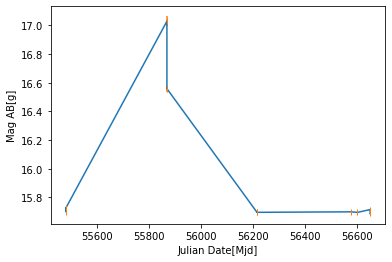

In [128]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Punto_A_PS1_[mask_ps1_a]['mjd'], Punto_A_PS1_[mask_ps1_a]['mag'], markersize=1)
plt.errorbar(Punto_A_PS1_[mask_ps1_a]['mjd'], Punto_A_PS1_[mask_ps1_a]['mag'], yerr=Punto_A_PS1_[mask_ps1_a]['magerr'], fmt="|")
plt.xlabel('Julian Date[Mjd]')
plt.ylabel('Mag AB[g]')

Text(0, 0.5, 'Mag AB')

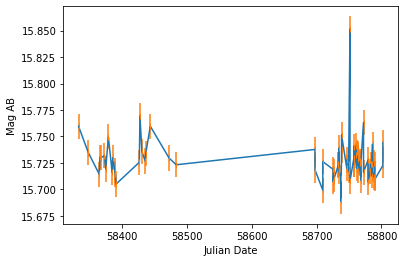

In [129]:
plt.plot(Punto_A_ZTF_[mask_ztf_a]['mjd'], Punto_A_ZTF_[mask_ztf_a]['mag'], markersize=1)
plt.errorbar(Punto_A_ZTF_[mask_ztf_a]['mjd'], Punto_A_ZTF_[mask_ztf_a]['mag'], yerr=Punto_A_ZTF_[mask_ztf_a]['magerr'], fmt="|")
plt.xlabel('Julian Date')
plt.ylabel('Mag AB')

In [ ]:
PUNTO B

Text(0, 0.5, 'Mag AB [g]')

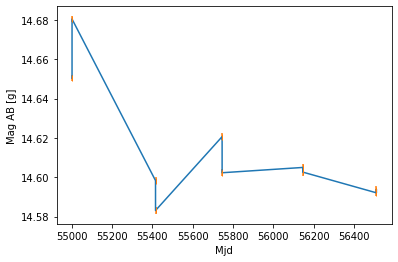

In [185]:
plt.plot(Punto_B_PS1_[mask_ps1_b]['mjd'], Punto_B_PS1_[mask_ps1_b]['mag'], markersize=1)
plt.errorbar(Punto_B_PS1_[mask_ps1_b]['mjd'],Punto_B_PS1_[mask_ps1_b]['mag'], yerr=Punto_B_PS1_[mask_ps1_b]['magerr'], fmt="|")
plt.xlabel('Mjd')
plt.ylabel('Mag AB [g]')

Text(0, 0.5, 'Mag AB [r]')

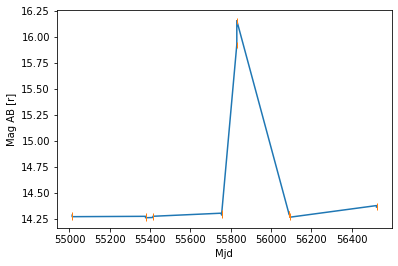

In [186]:
plt.plot(Punto_B_PS1_[mask_ps1_b_2]['mjd'], Punto_B_PS1_[mask_ps1_b_2]['mag'], markersize=1)
plt.errorbar(Punto_B_PS1_[mask_ps1_b_2]['mjd'],Punto_B_PS1_[mask_ps1_b_2]['mag'], yerr=Punto_B_PS1_[mask_ps1_b_2]['magerr'], fmt="|")
plt.xlabel('Mjd')
plt.ylabel('Mag AB [r]')

Text(0, 0.5, 'Mag AB [z]')

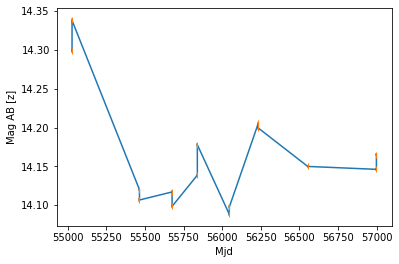

In [188]:
plt.plot(Punto_B_PS1_[mask_ps1_b_3]['mjd'], Punto_B_PS1_[mask_ps1_b_3]['mag'], markersize=1)
plt.errorbar(Punto_B_PS1_[mask_ps1_b_3]['mjd'],Punto_B_PS1_[mask_ps1_b_3]['mag'], yerr=Punto_B_PS1_[mask_ps1_b_3]['magerr'], fmt="|")
plt.xlabel('Mjd')
plt.ylabel('Mag AB [z]')

Text(0, 0.5, 'Mag AB [g]')

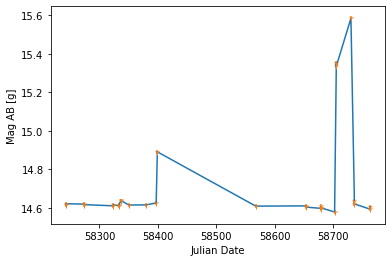

In [180]:
plt.plot(Punto_B_ZTF_[mask_ztf_b]['mjd'], Punto_B_ZTF_[mask_ztf_b]['mag'], markersize=1)
plt.errorbar(Punto_B_ZTF_[mask_ztf_b]['mjd'],Punto_B_ZTF_[mask_ztf_b]['mag'], yerr=Punto_B_ZTF_[mask_ztf_b]['magerr'], fmt="1")
plt.xlabel('Mjd')
plt.ylabel('Mag AB [g]')

In [87]:
from Freya_alerce.core.utils import Utils

In [100]:
transformar = Utils().hms_to_deg('3h24m19.4s 49d51m40s')#('16h29m24.45970s −26d25m55.2094s')#('16h29m24.45970s −26d25m55.2094s')
transformar

(51.08083333333333, 49.861111111111114)

Text(0, 0.5, 'Mag AB')

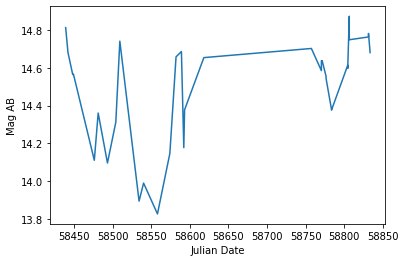

In [152]:
plt.plot(Punto_C_ZTF_[mask_ztf_c]['mjd'], Punto_C_ZTF_[mask_ztf_c]['mag'], markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('Mag AB')

Text(0, 0.5, 'Mag AB')

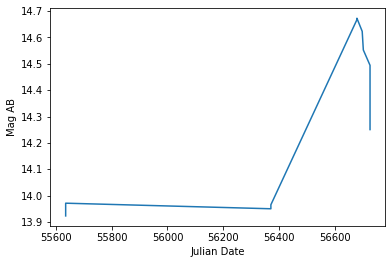

In [150]:
plt.plot(Punto_C_PS1_[mask_ps1_c]['mjd'], Punto_C_PS1_[mask_ps1_c]['mag'], markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('Mag AB')